In [13]:
from helper import euclidean_distance
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time
import random

def knn_linear_search(dataset: pd.DataFrame, target_id: int, k: int):
    """
    Finds the k-nearest neighbors to a target POI using linear search.

    Parameters:
        dataset (pd.DataFrame): A DataFrame containing POI data with columns '@id', '@lat', '@lon', and 'name'.
        target_id (int): The ID of the target POI.
        k (int): The number of nearest neighbors to find.

    Returns:
        list: A list of the '@id' and '@dist' of the k-nearest neighbors.
    """

    POI = dataset.loc[dataset['@id'] == target_id].iloc[0]

    dataset['@dist'] = dataset.apply(lambda row: euclidean_distance(row, POI), axis=1)

    top_k = dataset.nsmallest(k+1, '@dist', keep='first')

    result = top_k[1:][['@id', '@dist']].values.tolist()

    return result

def calculate_execution_time(N_list: list, k_list: list, dataset: pd.DataFrame):
    """
    Calculates the execution times of the kNN query for different dataset sizes (N) and k values.

    Parameters:
        N_list : List of sizes for the dataset.
        k_list : A list of k values to test.
        dataset : The dataset for which we have to calculate execution times.

    Returns:
        pd.DataFrame: A DataFrame containing the execution times for each combination of dataset size and k.
    """

    results = {k: [] for k in k_list}

    for n in N_list:
        mini_df = dataset[:min(n, len(dataset))].copy()

        for k in k_list:
            target_id = random.choice(mini_df['@id'].values)

            start_time = time.time()
            knn_linear_search(mini_df, target_id, k)
            total_time = time.time() - start_time

            results[k].append(total_time)

    return results

In [14]:
df = pd.read_csv('../dataset/clean_nyc_dataset.csv')

k_list = [1, 5, 10, 50, 100, 500]
N_list = [1000, 10000, 100000, 825171]

plot_data = calculate_execution_time(N_list, k_list, df)

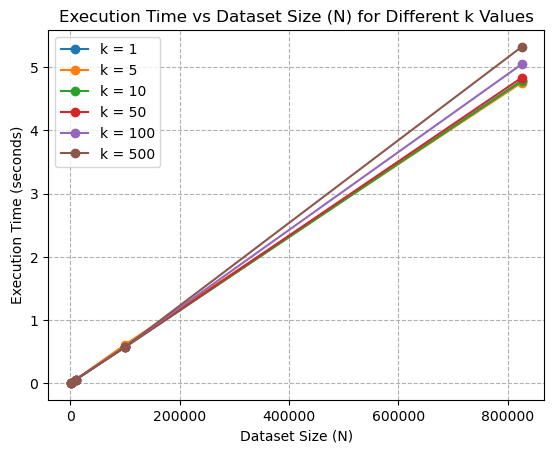

In [25]:
for k, exec_time in plot_data.items():
    plt.plot(N_list, exec_time, label=f'k = {k}', marker='o')

plt.title('Execution Time vs Dataset Size (N) for Different k Values')
plt.xlabel('Dataset Size (N)')
plt.ylabel('Execution Time (seconds)')
plt.legend()
plt.grid(True, linestyle='--')
plt.show()